# Code attachment to the project

**Initially this work was done as a university project for Financial Economics course**

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as pdr
pd.set_option('display.max_columns', None)

In [2]:
yf.pdr_override()

In [3]:
from pandas_datareader import data as pdr 
import matplotlib.pyplot as plt 
  

start = "2020-12-10"
end = "2023-12-10"
symbols = ['SPY', 'GOOGL', 'MSFT', 'PFE', 
           'LMT', 'DIS', 'VZ', 'PYPL',
          'TSN', 'DG', 'QCOM'] 

data = pdr.get_data_yahoo(symbols, start, end)['Close']

[*********************100%%**********************]  11 of 11 completed


### See the data

In [4]:
data = data.reset_index()
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,DG,DIS,GOOGL,LMT,MSFT,PFE,PYPL,QCOM,SPY,TSN,VZ
0,2020-12-10,205.869995,154.690002,88.382500,355.390015,210.520004,41.730000,215.339996,155.750000,366.730011,69.410004,60.509998
1,2020-12-11,206.610001,175.720001,88.739998,361.709991,213.259995,41.119999,214.059998,144.279999,366.299988,69.290001,60.349998
2,2020-12-14,205.899994,169.300003,87.612999,357.660004,214.199997,39.209999,220.789993,146.289993,364.660004,69.779999,59.980000
3,2020-12-15,207.779999,173.940002,88.054001,357.570007,214.130005,38.709999,221.600006,148.360001,369.589996,68.250000,60.549999
4,2020-12-16,211.020004,173.119995,87.859497,354.570007,219.279999,37.840000,230.199997,149.740005,370.170013,65.239998,59.910000
...,...,...,...,...,...,...,...,...,...,...,...,...
749,2023-12-04,134.830002,92.010002,129.270004,450.690002,369.140015,29.280001,59.849998,129.949997,456.690002,49.820000,38.040001
750,2023-12-05,133.389999,90.790001,130.990005,446.239990,372.519989,29.090000,57.919998,130.750000,456.600006,49.939999,38.419998
751,2023-12-06,133.919998,91.500000,130.020004,449.410004,368.799988,28.790001,59.529999,129.960007,454.760010,50.189999,38.500000
752,2023-12-07,132.300003,92.349998,136.929993,447.109985,370.950012,28.629999,58.480000,132.940002,458.230011,51.540001,38.650002


In [5]:
columns = data.columns
columns = [i for i in columns if i != 'Date']

### Plot stock values

As we see, the trend is negative in most cases.

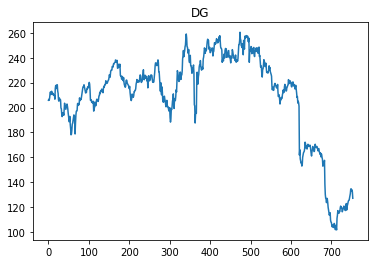

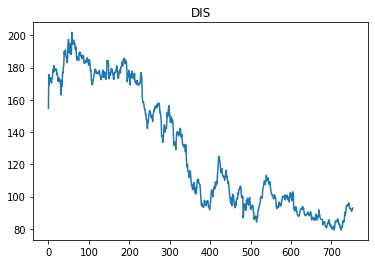

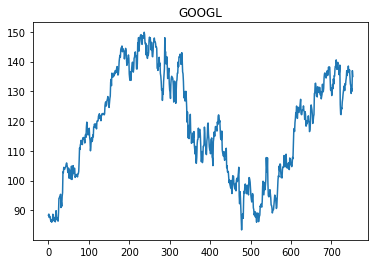

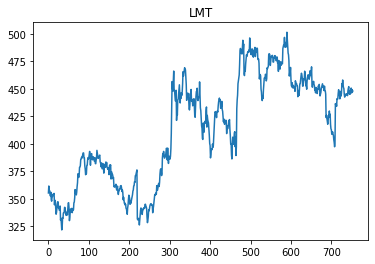

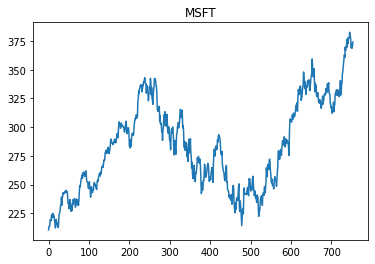

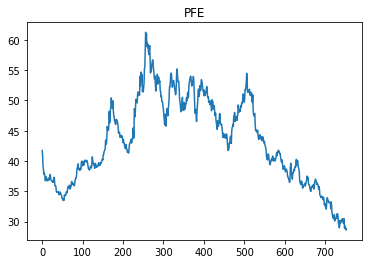

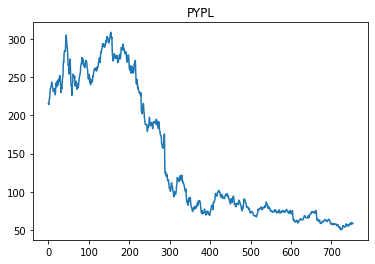

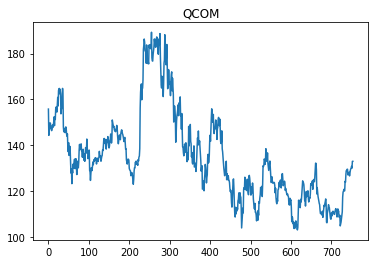

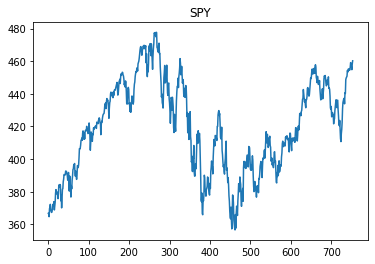

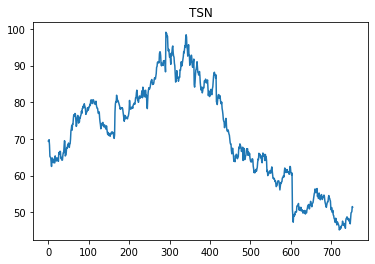

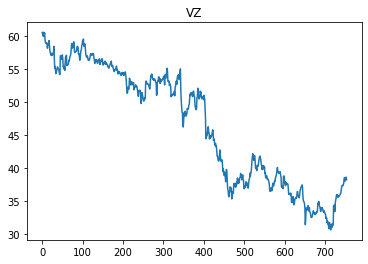

In [6]:
for column in columns:
    data[column].plot()
    plt.title(column)
    plt.show()

### Calculate the profitability of the companies, and the portfolio:

Suppose company costs x in 2020, and costs y in 2022. To determine the average growth rate (r), we need to solve the following equation:

$$x(1+r)^2 = y \Rightarrow r = (\frac{y}{x})^{\frac{1}{2}} - 1.$$

Since we distribute our money equally, we can just take the average of all $r_i$ to get the average growth rate of the portfolio. So it is time to do it.

In [7]:
data1 = data.loc[data['Date'].isin(['2020-12-10', '2022-12-12'])]
data1 = data1.set_index('Date')
data1.loc['r'] = data1.loc['2022-12-12'] / data1.loc['2020-12-10']
data1 = pd.DataFrame(data1.loc['r'])
data1['r'] = np.sqrt(data1['r']) - 1
data1

,r
DG,0.090481
DIS,-0.217738
GOOGL,0.027498
LMT,0.169791
MSFT,0.095198
PFE,0.118007
PYPL,-0.414582
QCOM,-0.117824
SPY,0.043004
TSN,-0.035794


In [8]:
# Drop S&P 500 and calculate the growth rate
data1 = data1.loc[~(data1.index.isin(['SPY']))]
r = np.mean(data1['r'])
r

-0.04930232093359231

Here I calculated actual growth rates, but we will use CAMP to estimate the expected.

### Calculate market betas

This is simply the correlation of the stock with S&P 500.

In [9]:
betas = {}
for column in columns:
    tmp = data[[column, 'SPY']]
    corr = tmp.corr()
    corr = corr.iloc[0, 1]
    betas[column] = corr
betas = pd.DataFrame(betas.items())
betas.columns = ['Company', 'Beta']
betas = betas.set_index('Company')
betas

,Beta
Company,
DG,-0.314848
DIS,0.121886
GOOGL,0.906932
LMT,-0.154620
MSFT,0.844448
PFE,0.098993
PYPL,0.122397
QCOM,0.373942
SPY,1.000000


In [10]:
# Since money is distributed equally (check the assumptions),
# The portfolio beta is just the average of betas
betas = betas.reset_index()
betas = betas.loc[~(betas.Company.isin(['SPY']))]
display(betas)
portfolio_beta = betas['Beta'].mean()
portfolio_beta

,Company,Beta
0,DG,-0.314848
1,DIS,0.121886
2,GOOGL,0.906932
3,LMT,-0.154620
4,MSFT,0.844448
5,PFE,0.098993
6,PYPL,0.122397
7,QCOM,0.373942
9,TSN,0.128538
10,VZ,0.031765


0.2159432977867522

Portfolio beta turned out to be close to 0.22. It means that, according to the model, with expect out portfolio to grow (since index is growing, and on average we are positively correlated with index, although not much).

### CAMP

$$E(r_i) = r_f + \beta_i(E(r_m) - r_f).$$

$r_m = 0.043, r_f = 0.0393$ (based on calculations and assumptions). Therefore, we just calculate individual expected returns, and then take the average of them.

In [11]:
betas['Expected_return'] = 0.0393 + betas['Beta'] * (0.043 - 0.0393)
betas

,Company,Beta,Expected_return
0,DG,-0.314848,0.038135
1,DIS,0.121886,0.039751
2,GOOGL,0.906932,0.042656
3,LMT,-0.154620,0.038728
4,MSFT,0.844448,0.042424
5,PFE,0.098993,0.039666
6,PYPL,0.122397,0.039753
7,QCOM,0.373942,0.040684
9,TSN,0.128538,0.039776
10,VZ,0.031765,0.039418


In [12]:
capm_r = betas['Expected_return'].mean()
capm_r

0.04009899020181098

So the expected return is around 4%. Now we will calculate the real return:

### Compare 2023 with 2022

In [13]:
data2 = data.loc[data['Date'].isin(['2022-12-08', '2023-12-08'])]
data2 = data2.set_index('Date')
data2.loc['r'] = data2.loc['2023-12-08'] / data2.loc['2022-12-08']
data2 = pd.DataFrame(data2.loc['r'])
data2['r'] = np.sqrt(data2['r']) - 1
data2

,r
DG,-0.284780
DIS,0.001458
GOOGL,0.200212
LMT,-0.039256
MSFT,0.229899
PFE,-0.254471
PYPL,-0.108863
QCOM,0.045063
SPY,0.077691
TSN,-0.103020


In [14]:
# real return turned out to be negative, but I anticipated it
data2 = data2.loc[~(data2.index.isin(['SPY']))]
r = np.mean(data2['r'])
r

-0.029837857603552575